# here graphs of non-spatial nature are produced

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# graphs for all WWTPS

In [5]:
# read non=spatial data for introduction
data=pd.read_excel('final/database.xlsx')
data.year=data.year.astype(int)


In [6]:
mask1=data.year<2077
mask2=data.year>1899
data=data[(mask1 & mask2)]
data.year.min()

1905

# by tech type and time


In [64]:
data_tech=data.groupby(['tech_type','year']).count().reset_index()
data_tech=data_tech.pivot('year','tech_type','PE')

#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'ASP','Fest':'SFB','Tropf':'TF','PKA':'CW'}
data_tech.rename(columns=types,inplace=True)
# reomve minor categories to avoid color overload
data_tech.drop(columns=['Filtration','MBR','Tauch','RBC','Other'],inplace=True)

Text(0.5, 1.0, 'Temporal Distribution Of WWTPSUp To 500 PEs')

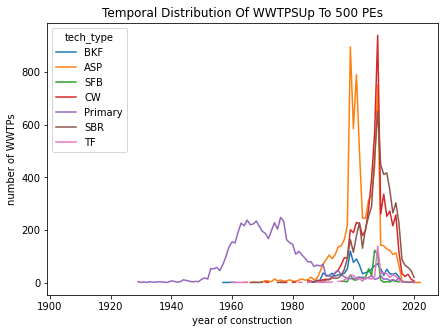

In [66]:
fig, ax= plt.subplots(1, figsize=(7,5))
   

lines=data_tech.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')


"colormap = plt.get_cmap('tab10') \nfor i,j in enumerate(ax.lines):\n    j.set_color(colors[i])"

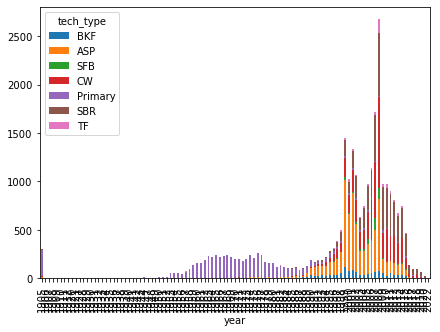

In [67]:
fig, ax= plt.subplots(1, figsize=(7,5))
"""colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
"""
data_tech.plot.bar(stacked=True,ax=ax)

"""colormap = plt.get_cmap('tab10') 
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])"""

Text(0.5, 0, 'year of construction')

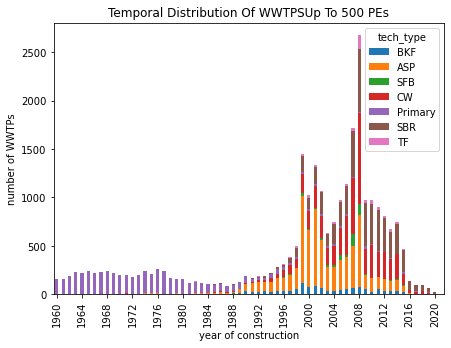

In [68]:
zoom_tech=data_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
zoom_tech.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

# only primary

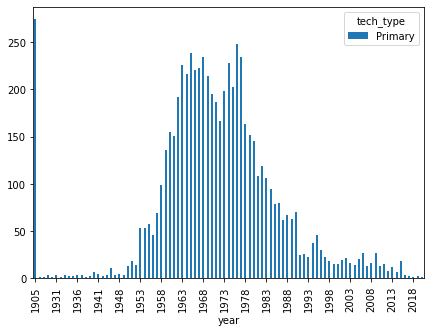

In [41]:
only_nonitri=data.groupby(['tech_type','year']).count().reset_index()
only_nonitri=only_nonitri[only_nonitri.tech_type=='Primary']
only_nonitri=only_nonitri.pivot('year','tech_type','PE')

fig, ax= plt.subplots(1, figsize=(7,5))
only_nonitri.plot.bar(ax=ax)
plt.locator_params(axis="x", nbins=20)

In [7]:
small=data[data.PE<=50]
medium=data[data.PE>50]
sizes=[small,medium]

small_tech=small.groupby(['tech_type','year']).count().reset_index()
small_tech=small_tech.pivot('year','tech_type','PE')

#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'ASP','Fest':'SFB','Tropf':'TF','PKA':'CW'}
small_tech.rename(columns=types,inplace=True)
# reomve minor categories to avoid color overload
small_tech.drop(columns=['Filtration','MBR','Tauch','RBC','Other'],inplace=True)

medium_tech=medium.groupby(['tech_type','year']).count().reset_index()
medium_tech=medium_tech.pivot('year','tech_type','PE')
#ASP: activated sludge process, SFB: submerged fixed bed, TF: trickling filter, Construcuted wetland
types={'Bel.':'ASP','Fest':'SFB','Tropf':'TF','PKA':'CW'}
medium_tech.rename(columns=types,inplace=True)

# reomve minor categories to avoid color overload
medium_tech.drop(columns=['MBR','RBC','Other'],inplace=True)


Text(0.5, 0, 'year of construction')

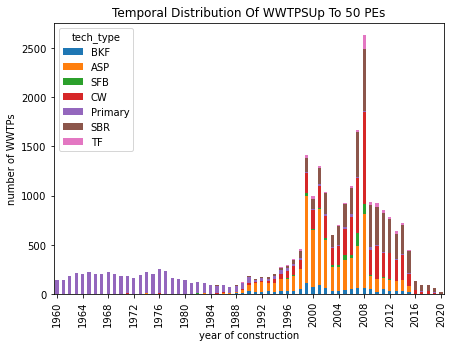

In [76]:
zoom_tech=small_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
zoom_tech.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 50 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

Text(0.5, 0, 'year of construction')

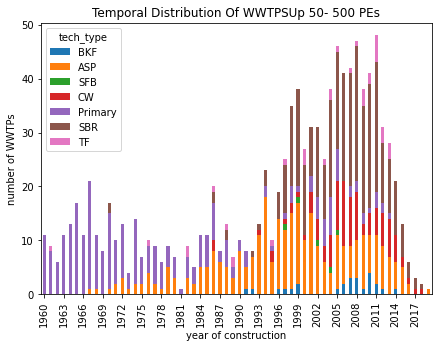

In [77]:
zoom_tech=medium_tech.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
zoom_tech.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up 50- 500 '.title()+'PEs')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')

In [100]:
test=data.groupby('tech_type').count()['PE'].reset_index()
test['%']=test.PE.transform(lambda x: 100*x/x.sum())
test

,tech_type,PE,%
0,BKF,1256,4.376764
1,Bel.,7297,25.427745
2,Fest,475,1.655225
3,Filtration,24,0.083632
4,MBR,27,0.094086
5,Other,1118,3.895878
6,PKA,5683,19.803464
7,Primary,6455,22.493640
8,RBC,64,0.223020
9,SBR,5684,19.806948


# show percentages of tech_type total

(-1.1192001977282986,
 1.1009142971259442,
 -1.1280560487507296,
 1.1099847052619447)

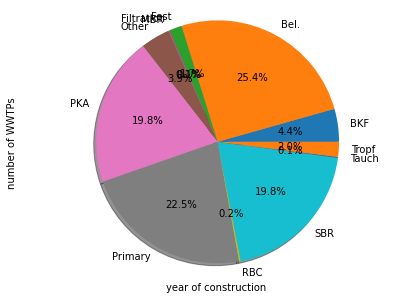

In [109]:
fig, ax= plt.subplots(1, figsize=(7,5))
ax.pie(test['%'], autopct='%1.1f%%',
        shadow=True, labels=test.tech_type.unique())
ax.set_title('')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.axis('equal')

In [ ]:
fig, ax= plt.subplots(1, figsize=(7,5))
ax.pie(test['%'], autopct='%1.1f%%',
        shadow=True, labels=test.tech_type.unique())
ax.set_title('')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.axis('equal')

(-1.1213068091388898,
 1.1010146179993476,
 -1.128741570858221,
 1.1095593636957306)

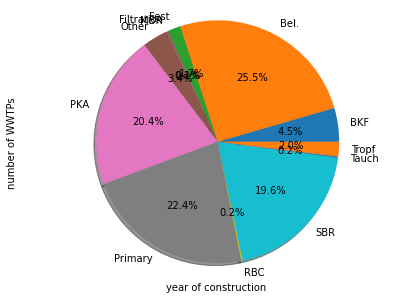

In [10]:
test_small=small.groupby('tech_type').count()['PE'].reset_index()
test_small['%']=test_small.PE.transform(lambda x: 100*x/x.sum())
test_small
fig, ax= plt.subplots(1, figsize=(7,5))
ax.pie(test_small['%'], autopct='%1.1f%%',
        shadow=True, labels=test_small.tech_type.unique())
ax.set_title('')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.axis('equal')

(-1.125893062914408,
 1.101233002995924,
 -1.1292632082399465,
 1.1065788077690393)

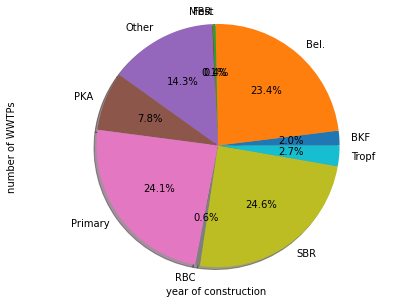

In [8]:
test_medium=medium.groupby('tech_type').count()['PE'].reset_index()
test_medium['%']=test_medium.PE.transform(lambda x: 100*x/x.sum())
fig, ax= plt.subplots(1, figsize=(7,5))
ax.pie(test_medium['%'], autopct='%1.1f%%',
        shadow=True, labels=test_medium.tech_type.unique())
ax.set_title('')
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.axis('equal')

In [17]:
percentage=pd.merge(test_small, test_medium, on='tech_type')

In [18]:
percentage

,tech_type,PE_x,%_x,PE_y,%_y
0,BKF,1231,4.489751,25,1.954652
1,Bel.,6998,25.523379,299,23.377639
2,Fest,470,1.714202,5,0.390930
3,MBR,26,0.094828,1,0.078186
4,Other,935,3.410169,183,14.308053
5,PKA,5583,20.362536,100,7.818608
6,Primary,6147,22.419578,308,24.081314
7,RBC,56,0.204245,8,0.625489
8,SBR,5369,19.582026,315,24.628616
9,Tropf,536,1.954920,35,2.736513


<AxesSubplot:>

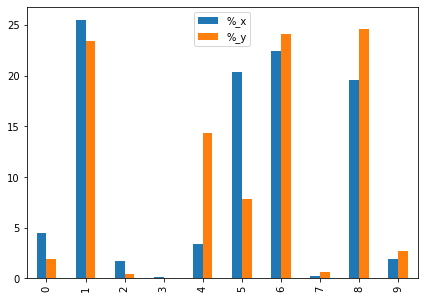

In [19]:
fig, ax= plt.subplots(1, figsize=(7,5))
percentage.plot.bar(ax=ax,y=['%_x','%_y'])


In [20]:
percentage

,tech_type,PE_x,%_x,PE_y,%_y
0,BKF,1231,4.489751,25,1.954652
1,Bel.,6998,25.523379,299,23.377639
2,Fest,470,1.714202,5,0.390930
3,MBR,26,0.094828,1,0.078186
4,Other,935,3.410169,183,14.308053
5,PKA,5583,20.362536,100,7.818608
6,Primary,6147,22.419578,308,24.081314
7,RBC,56,0.204245,8,0.625489
8,SBR,5369,19.582026,315,24.628616
9,Tropf,536,1.954920,35,2.736513


In [29]:
to_plot=percentage.pivot_table(columns='tech_type',values=['%_x','%_y'])

<AxesSubplot:>

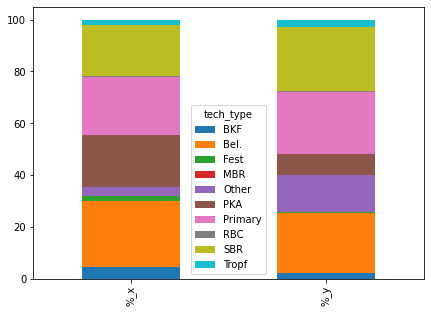

In [32]:
fig, ax= plt.subplots(1, figsize=(7,5))
to_plot.plot.bar(ax=ax,stacked=True)

# show construction history
## is average meaningful?

In [34]:
data_all=data.groupby(['BL','year']).count().reset_index()
data_all=data_all.pivot('year','BL','PE')



Text(0.5, 1.0, 'Temporal Distribution Of WWTPSUp To 500 PEs')

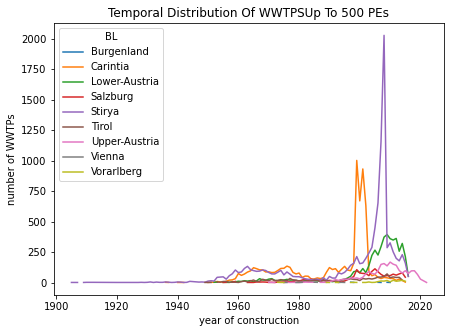

In [5]:
fig, ax= plt.subplots(1, figsize=(7,5))
lines=data_all.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500 '.title()+'PEs')


# show only recent history

In [6]:
mask2=data.year>1993
only_recent=data[(mask2)]
only_recent=only_recent.groupby(['BL','year']).count().reset_index()
only_recent=only_recent.pivot('year','BL','PE')
#z['average']=z.mean(axis=1)

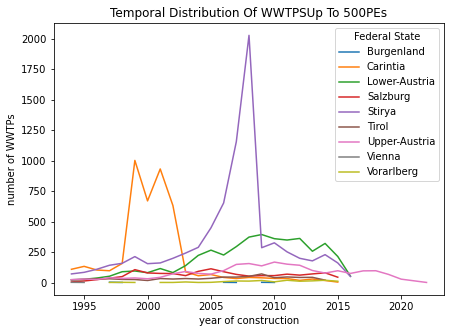

In [7]:
fig, ax= plt.subplots(1, figsize=(7,5))
only_recent.plot(ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('year of construction')
ax.set_title('temporal distribution of'.title() +' WWTPS'+'up to 500'.title()+'PEs')
ax.legend(title='Federal State')

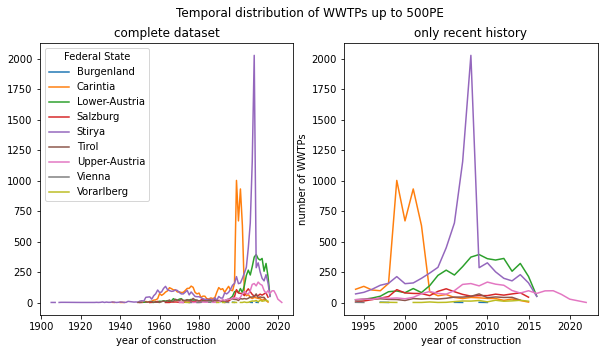

In [8]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
data_all.plot(ax=ax[0])
only_recent.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

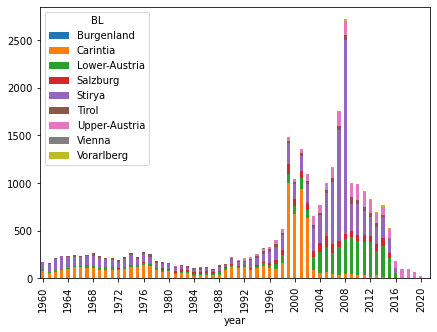

In [36]:
zoom_data=data_all.loc[1960:,:]
fig, ax= plt.subplots(1, figsize=(7,5))
zoom_data.plot.bar(stacked=True,ax=ax)
plt.locator_params(axis="x", nbins=20)

In [10]:
only_major=data_all.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])
only_recent_major=only_recent.drop(columns=['Burgenland', 'Vienna', 'Vorarlberg'])

In [11]:
only_major

BL,Carintia,Lower-Austria,Salzburg,Stirya,Tirol,Upper-Austria
year,,,,,,
1905,NaN,NaN,NaN,1.0,NaN,325.0
1906,NaN,NaN,NaN,1.0,NaN,NaN
1907,NaN,NaN,NaN,1.0,NaN,NaN
1908,NaN,1.0,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,96.0
2018,NaN,NaN,NaN,NaN,NaN,97.0
2019,NaN,NaN,NaN,NaN,NaN,67.0


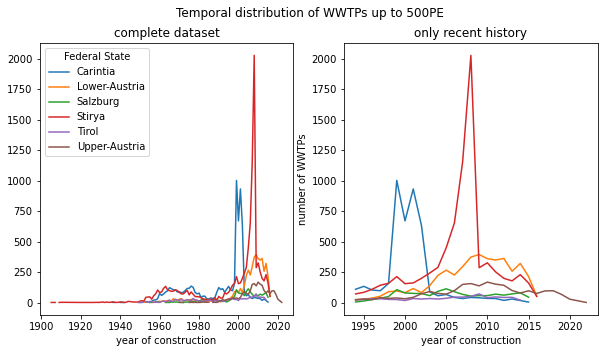

In [12]:
fig, ax= plt.subplots(1,2 ,figsize=(10,5))
only_major.plot(ax=ax[0])
only_recent_major.plot(ax=ax[1], legend=False)
plt.ylabel('number of WWTPs')
ax[0].set_xlabel('year of construction')
ax[1].set_xlabel('year of construction')
ax[0].set_title('complete dataset')
ax[1].set_title('only recent history')
plt.suptitle('temporal distribution of'.capitalize() +' WWTPs'+' up to 500'+'PE')
ax[0].legend(title='Federal State')
plt.savefig('graphs/temporal.png', bbox_inches='tight' )

# put into size categories

In [30]:
small=data[data.PE<=50]
medium=data[data.PE>50]
sizes=[small,medium]


In [28]:
def temp_graph(sizes):
    for size in sizes:
        groupBL=size.groupby(['BL','year']).count().reset_index()
        table=groupBL.pivot('year','BL','PE')

        fig, ax= plt.subplots(1, figsize=(7,5))
        lines=table.plot(ax=ax)
        plt.ylabel('number of WWTPs')
        plt.xlabel('year of construction')


# main exapnsion at same time from 1990
# stiria invested in small, while NOE in medium


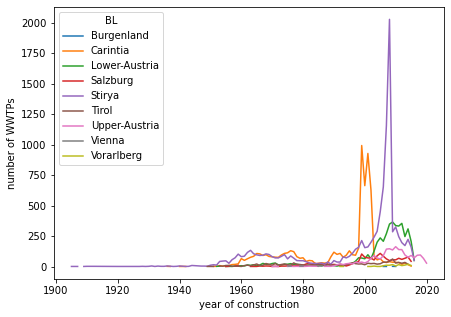

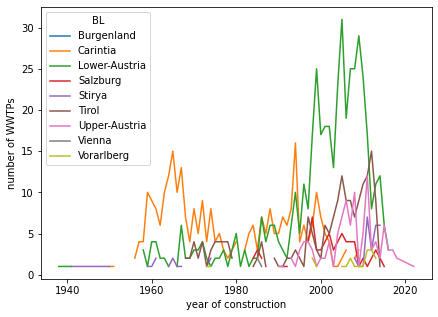

In [29]:
temp_graph(sizes)

# by tech_type
## have some data problem: 0s and un-unified categories

# PE workflow

In [2]:
data=gpd.read_file('final/complete.geojson')

In [7]:
#PE workflow
data_BL=data.groupby('BL').sum().reset_index()#[['BL','PE_nonitri_tot','sum_PE_tot','no_nitri_tot','freq_tot']]
data_BL['%BL_PE_nonitri']=data_BL.PE_nonitri_tot/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_small']=data_BL.PE_nonitri_small/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_medium']=data_BL.PE_nonitri_medium/data_BL.sum_PE_tot*100
data_BL['%BL_PE_nonitri_medium_excl']=data_BL.PE_nonitri_medium/data_BL.sum_PE_medium*100

#number of infra workflow
data_BL['%BL_nonitri']=data_BL.no_nitri_tot/data_BL.freq_tot*100
data_BL['%BL_nonitri_small']=data_BL.no_nitri_small/data_BL.freq_tot*100
data_BL['%BL_nonitri_medium']=data_BL.no_nitri_medium/data_BL.freq_tot*100
data_BL['%BL_nonitri_medium_excl']=data_BL.no_nitri_medium/data_BL.freq_medium*100

In [67]:
data[data.BL=='Upper-Austria'].no_nitri_tot.sum()

2265.0

### number of WWTPS

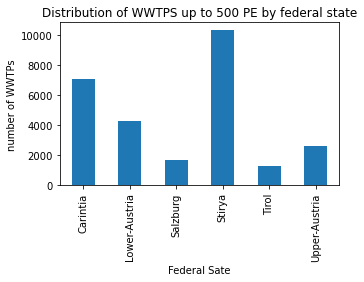

In [5]:
#number of infra
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y=['freq_tot'], ax=ax)
plt.ylabel('number of WWTPs')
plt.xlabel('Federal Sate')
ax.set_title('distribution of'.capitalize() +' WWTPS'+' up to 500'+' PE'+' by federal state')
ax.get_legend().remove()
plt.savefig('graphs/freq_BL.png', bbox_inches='tight')



### number of PEs

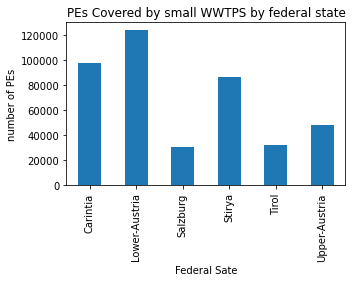

In [6]:
fig, ax= plt.subplots(1, figsize=(5,3))
data_BL.plot.bar(x='BL',y='sum_PE_tot', ax=ax)
plt.ylabel('number of PEs')
plt.xlabel('Federal Sate')
ax.set_title('PEs '+ 'covered by small'.capitalize() +' WWTPS by federal state')
ax.get_legend().remove()
plt.savefig('graphs/PE_sum_BL.png', bbox_inches='tight')


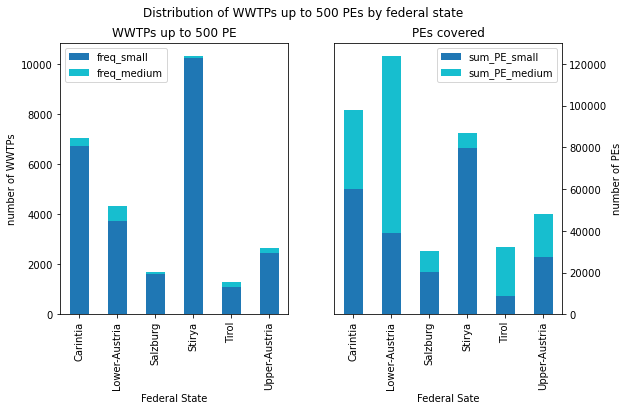

In [17]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot(kind='bar', y=['sum_PE_small','sum_PE_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal Sate')
ax[1].set_title('PEs '+ 'covered')
#ax[1].get_legend().remove()
fig.suptitle('Distribution of WWTPs up to 500 PEs by federal state')
data_BL.plot(kind='bar', y=['freq_small','freq_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('WWTPs'+' up to 500'+' PE')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
#ax[0].get_legend().remove()
plt.savefig('graphs/freq_BL+sum_PE.png', bbox_inches='tight')

# see size difference

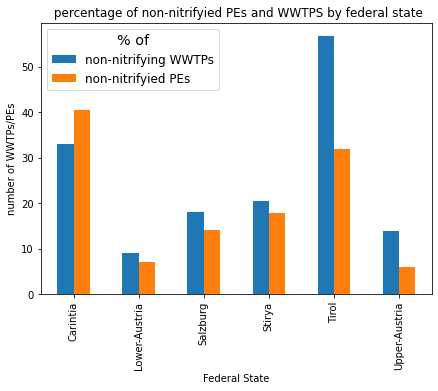

In [12]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot.bar(x='BL', y=['%BL_nonitri','%BL_PE_nonitri'],ax=ax)
plt.ylabel('number of WWTPs/PEs')
plt.xlabel('Federal State')
ax.set_title(' Percentage of Non-nitrifyied'.capitalize() +' PEs and WWTPS by federal state')
ax.legend(['non-nitrifying WWTPs','non-nitrifyied PEs'], title='% of', title_fontsize='x-large', fontsize='large')
plt.savefig('graphs/%nonitri+%PE_nonitri_BL.png', bbox_inches='tight')



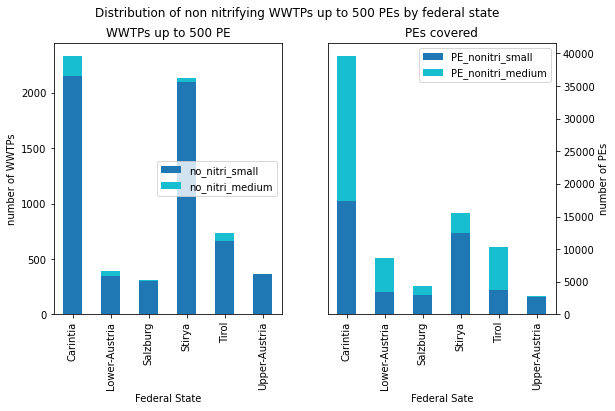

In [19]:
fig, ax= plt.subplots(1,2, figsize=(9,5))
data_BL.plot(kind='bar', y=['PE_nonitri_small','PE_nonitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[1])
ax[1].set_ylabel('number of PEs')
ax[1].set_xlabel('Federal Sate')
ax[1].set_title('PEs '+ 'covered')
#ax[1].get_legend().remove()
fig.suptitle('Distribution of non nitrifying WWTPs up to 500 PEs by federal state')
data_BL.plot(kind='bar', y=['no_nitri_small','no_nitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax[0])
ax[0].set_ylabel('number of WWTPs')
ax[0].set_xlabel('Federal State')
ax[0].set_title('WWTPs'+' up to 500'+' PE')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
#ax[0].get_legend().remove()
plt.savefig('graphs/PE_nonitri+freq_nonitri_both.png', bbox_inches='tight')

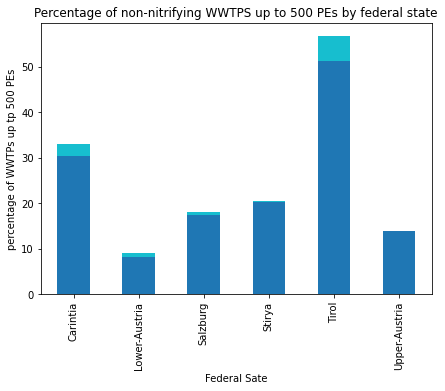

In [137]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['%BL_nonitri_small','%BL_nonitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal Sate')
ax.set_title('percentage of non-nitrifying'.capitalize() +' WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/%nonitri.png', bbox_inches='tight')

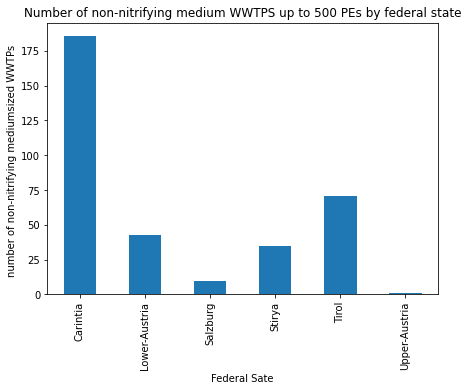

In [16]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['no_nitri_medium'],x='BL',
                    stacked=False, 
                    colormap='tab10',ax=ax)
plt.ylabel('number of non-nitrifying mediumsized WWTPs ')
plt.xlabel('Federal Sate')
ax.set_title('number of non-nitrifying'.capitalize() +' medium WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/freq_nonitri_medium.png', bbox_inches='tight')

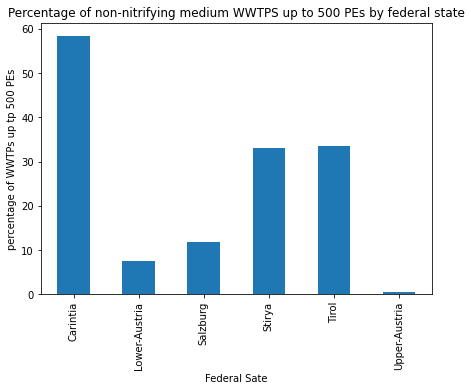

In [15]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(7,5))
data_BL.plot(kind='bar', y=['%BL_nonitri_medium_excl'],x='BL',
                    stacked=False, 
                    colormap='tab10',ax=ax)
plt.ylabel('percentage of WWTPs up tp 500 PEs')
plt.xlabel('Federal Sate')
ax.set_title('percentage of non-nitrifying'.capitalize() +' medium WWTPS up to 500 PEs by federal state')
ax.legend(['non-nitrifying WWTPs'], title='% of ', title_fontsize='x-large', fontsize='large')
ax.get_legend().remove()

plt.savefig('graphs/%nonitri_medium_excl.png', bbox_inches='tight')

# get population

In [23]:
#aadding POP variable 
pop=pd.read_excel('DATA/einwohnerzahl_nach_ortschaften_1.1.2021_gebietsstand_1.1.2021.xlsx', header=1)
pop.rename(columns={'Ortschaftsname':'KG','Gemeindename':'PG','Bundesland':'BL','Bevölkerung\nam 1.1.2021':'Pop'},inplace=True)
#merge on BL
pop=pop.groupby('BL').sum().reset_index()
pop.drop(index=4,inplace=True)
pop=pop[['BL','Pop']]
#rename BLS
pop.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)
BL=data.groupby('BL').sum().reset_index()
pop_BL=pd.merge(BL,pop,on='BL', how='outer')
pop_BL.loc['Total']= pop_BL.sum()
pop_BL['Pop_coverage']=pop_BL.sum_PE_tot/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri']=pop_BL.PE_nonitri_tot/pop_BL.Pop*100
pop_BL.loc['Total','BL']='Austria'




In [116]:
pop_BL['Pop_coverage_small']=pop_BL.sum_PE_small/pop_BL.Pop*100
pop_BL['Pop_coverage_medium']=pop_BL.sum_PE_medium/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_small']=pop_BL.PE_nonitri_small/pop_BL.Pop*100
pop_BL['Pop_coverage_no_nitri_medium']=pop_BL.PE_nonitri_medium/pop_BL.Pop*100

In [125]:

pop_BL.drop(index=[6,7,8], inplace=True)

# pop coverage

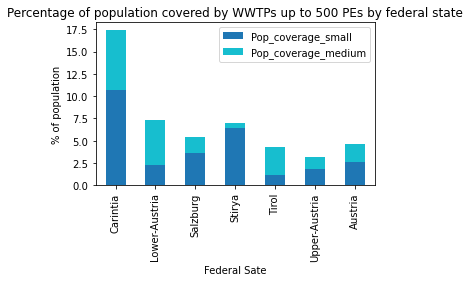

In [127]:
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_small','Pop_coverage_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
                    
plt.ylabel('% of population')
plt.xlabel('Federal Sate')
ax.set_title('Percentage of population covered by'.capitalize() +' WWTPs up to 500 PEs by federal state')
plt.savefig('graphs/%pop_BL.png', bbox_inches='tight')


# pop coverage no nitri


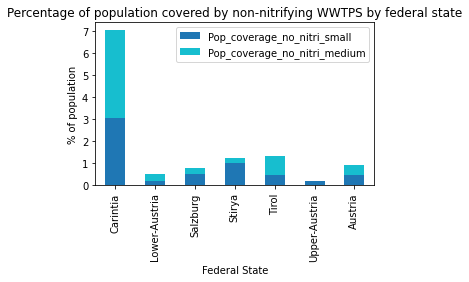

In [128]:
#% of non nitrifying infra and not nitirifie PE
fig, ax= plt.subplots(1, figsize=(5,3))
pop_BL.plot(kind='bar', y=['Pop_coverage_no_nitri_small','Pop_coverage_no_nitri_medium'],x='BL',
                    stacked=True, 
                    colormap='tab10',ax=ax)
plt.ylabel('% of population')
plt.xlabel('Federal State')
ax.set_title('percentage of population covered by non-nitrifying'.capitalize() +' WWTPS by federal state')
plt.savefig('graphs/%popnonitri_BL.png', bbox_inches='tight')


# graphs of unified dataset VS original Gunter
### freq, tech_type, PE